In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from kmodes import kmodes,kprototypes


%reload_ext autoreload
%autoreload 2

### To-do: 
#### 1.Filter RASS responses by zipcode
#### 2.Choose which categorical variables to use for clustering. Drop variables like zipcode that shouldn't be used for clustering.
#### 3.Specify to k-prototypes which variables are categorical.

In [84]:
rass_data = pd.read_csv('data/2019_rass_data.csv')
rass_survey_formats = pd.read_csv('data/2019_rass_survey_formats.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (535,537) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#Filter for LADWP territory.
ladwp_rass = rass_data[rass_data['eutil']==1]

#Filter for Los Angeles climate zone.
czLA_ladwp_rass = ladwp_rass[ladwp_rass['CZT24']==6]

#Filter for CEC forecasting zone "LADWP Coastal"
filtered_rass = czLA_ladwp_rass[czLA_ladwp_rass['cec_forcasting_zone']==16]

In [27]:
filtered_rass.to_csv('rass_ladwp_coastal_2019.csv')

In [233]:
np.unique(filtered_rass.INCOME19)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 97])

In [369]:
columns = ['res', 'BUILTYR', "INCOME19"]

res_vals = np.unique(filtered_rass.res)
built_vals = np.unique(filtered_rass.BUILTYR)
inc_vals = np.unique(filtered_rass.INCOME19)

probs = np.zeros((len(res_vals), len(built_vals), len(inc_vals)))

for i, i_res in enumerate(res_vals):
    for j, j_built in enumerate(built_vals):
        for k, k_inc in enumerate(inc_vals):
            res_inds = filtered_rass.res == i_res
            built_inds = filtered_rass.BUILTYR == j_built
            inc_inds = filtered_rass.INCOME19 == k_inc
            intersection = np.logical_and(np.logical_and(res_inds, built_inds), inc_inds)
            probs[i,j,k] = np.sum(intersection)
    
probs /= np.sum(probs)

In [370]:
flat_probs = probs.flatten()
sort_inds = np.argsort(flat_probs)[::-1]
flat_sorted_probs = flat_probs[sort_inds]
flat_cords = np.array(np.unravel_index(sort_inds, probs.shape))

In [371]:
flat_cords[:,2]

array([ 3, 12, 12])

In [372]:
flat_survey_responses = []
for i in range(flat_cords.shape[1]):
    flat_survey_responses.append([res_vals[flat_cords[0,i]], built_vals[flat_cords[1,i]], inc_vals[flat_cords[2,i]]])
flat_survey_responses = np.array(flat_survey_responses).T


In [373]:
flat_cords

array([[ 0,  0,  3, ...,  3,  3,  0],
       [ 2,  1, 12, ...,  0,  0,  0],
       [11, 11, 12, ...,  7,  6,  0]])

In [374]:
end = 220

In [375]:
flat_sorted_probs[:end].sum()

1.0

In [376]:
cmap=plt.get_cmap('Accent')

In [378]:
flat_survey_responses[dim, :end]

array([1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 1,
       4, 4, 2, 4, 2, 1, 1, 1, 1, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 2,
       4, 2, 1, 4, 3, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 2, 4, 2, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 4, 4, 3, 4, 1, 1, 1,
       1, 1, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 3, 3,
       3, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 5, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 5, 1, 1, 1])

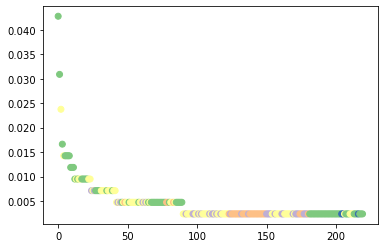

In [366]:
dim = 0
colors = [cmap(i) for i in flat_cords[dim, :end]]
plt.scatter(np.arange(end),flat_sorted_probs[:end], c=colors)

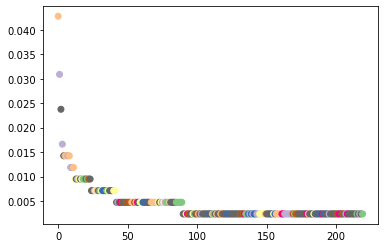

In [361]:
dim = 1
colors = [cmap(i) for i in flat_cords[dim, :end]]
plt.scatter(np.arange(end),flat_sorted_probs[:end], c=colors)

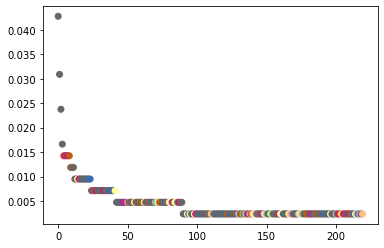

In [362]:
dim = 2
colors = [cmap(i) for i in flat_cords[dim, :end]]
plt.scatter(np.arange(end),flat_sorted_probs[:end], c=colors)

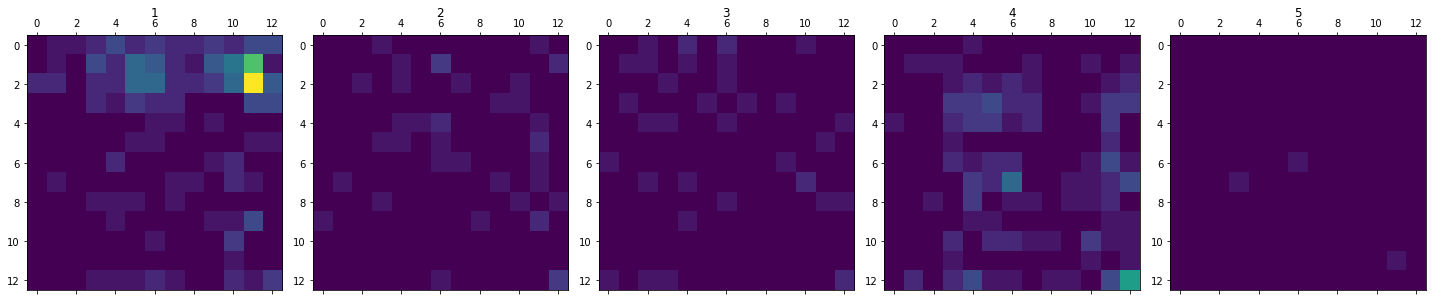

In [391]:
fig, ax = plt.subplots(1, probs.shape[0],figsize = (20,5))
for i in range(probs.shape[0]):
    inc_probs = probs[i]
    ax[i].matshow(inc_probs, vmin=0, vmax=probs.max())
    ax[i].set_title(res_vals[i])
plt.tight_layout()

In [246]:


#Filter rass data for categorical variables (int and string values)
categorical_col_inds = filtered_rass.dtypes != float
categorical_index = np.where(categorical_col_inds)

In [ ]:
#Drop columns with nans.
filtered_rass_dropna = filtered_rass.dropna(axis='columns')

In [189]:
#categorical_df.drop(columns='servzip', inplace=True)

In [224]:
#Alternate method: use survey format csv to filter for categorical variables.

# categorical_vars = rass_survey_formats['Variable'].unique().tolist()
# categorical_cols = [x for x in filtered_rass.columns if x in categorial_vars]
# categorical = filtered_rass[categorical_cols]

### Kmodes method (just categorical variables)

In [226]:
#kmodes method on categorical variables.

km = kmodes.KModes(n_clusters=2, init='Cao',verbose=1)
clusters = km.fit_predict(filtered_rass_dropna)
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 50871.0
Run 1, iteration: 2/100, moves: 0, cost: 50871.0
[['1' '3' '16' ... '90066' '1' '1']
 ['1' '97' '16' ... '90045' '97' '97']]


In [223]:
km.cluster_centroids_

array([['1', '3', '16', ..., '90066', '1', '1'],
       ['1', '97', '16', ..., '90045', '97', '97']], dtype='<U32')

### Kprototypes (categorical and numerical variables)

In [221]:
# categorical_list = list(categorical_index[0])

In [222]:
# kp = kprototypes.KPrototypes(n_clusters=2, verbose=1)
# clusters = kp.fit_predict(filtered_rass_dropna, categorical = categorical_list)